In [ ]:
# Исследование ошибки по инварианту. Поиск численного насыщения

In [1]:
# Шаг 1 - зависимости
import attractor
from attractor import Attractor
import matplotlib.pyplot as plt
import numpy as np
import copy

In [2]:
# Шаг 2 - функция возвращающая примую найденную методом наименьших квадратов
# Роль ошибки играет коэф наклона m (Далее он называется K). Инвариант должен быть неизменен, потому в теории K == 0. Это позволяет рассматривать эксперементальное K != 0 как значение ошибки
def lse(dots):
    x = dots[1]
    y = dots[0]
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return m,c


In [5]:
# Шаг 3 - Инициализация параметров для эксперимента
arr = [[],[]] # Массив точек
inv = 5 #  Номер инварианта для оценки метода. В работе используется 5
method = 'ABM5'  # Исследуемый метод. В работе выбран метод ABM5
rg = 1.0  # Расстояние, на котором производится иссдледование. Его увеличение пропорционально увеличит время.
# eth_step = 0.00001

1000000


In [ ]:
# 

In [ ]:
# Шаг 4 - Выставьте шаг для итерации исседования
step = 0.0001
num_steps = int(rg/step)
print(num_steps)

In [71]:
# Шаг 5 - Расчет
AL1 = Attractor(step=step, num_steps=num_steps)
AL1.set_invariant_params(inv)
AL1.iterator_method(method)
calls = AL1.get_counter()
print("calls_f: ", calls)

# Get inv func
I, err = AL1.get_invariant_err(inv, dt=0.000001)

# Cut thirds
l = int(I.shape[1] * (1.0 / 3.0))
I = I[:, l:-l]
err = err[:, l:-l]
txt = f'{method}@{inv}#{calls}'

M = np.mean(I[0])
D = np.std(I[0] - M)
K, C = lse(I)

# arr[0].append(step)
# arr[1].append(K)
print(step)
print(K)

123456789
calls_f:  1899936
1e-05
-7.947776087557896e-13


In [62]:
# Шаг 6 - Добавление точки (шаг, ошибка) в массив. 
arr[0].append(step)
arr[1].append(K)

In [ ]:
# Выполняйте шаги 4-6 с разными шагами, пока не накопится достаточно точек для анализа

In [67]:
# __arr1 = copy.deepcopy(arr)

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]
[4.856410520041255, 0.0001469092709565499, 1.6073182163714313e-09, 4.078104183139979e-12, -7.947776087557896e-13, 6.239155613013155e-11]


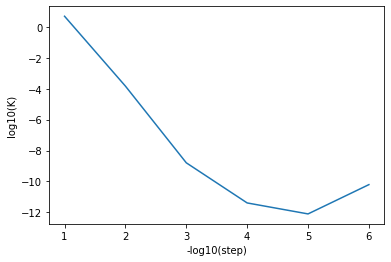

In [69]:
# Шаг7 - Построения графика ошибки от размера шага. При слишком маленьком шаге произойдет численное насыщение и ошибка начнет расти
print(arr[0])
print(arr[1])
plt.xlabel("-log10(step)")
plt.ylabel("log10(K)")
plt.plot(-np.log10(np.abs(arr[0])),np.log10(np.abs(arr[1])))